# Lista de exercícios 1

<br/>**Disciplina**: Aprendizado de Máquina
<br/>**Professor**: Dr. Patrick Marques Ciarelli

**Aluno**: Renan Sarcinelli

In [1]:
#UPLOAD da Base de dados para o Ambiente
!git clone https://github.com/sarcinelliRenan/Aprendizado-de-maquina.git
%cd Aprendizado-de-maquina/Lista1/
!ls

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import time

import alg
import tsne

Cloning into 'Aprendizado-de-maquina'...
remote: Counting objects: 34, done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 34 (delta 3), reused 33 (delta 2), pack-reused 0
Unpacking objects: 100% (34/34), done.
/content/Aprendizado-de-maquina/Lista1
alg.py	bases  Images  tsne.py


# Parte I – Pré-Processamento de Dados

## Exe. 1
Dada a base de dados CNAE_9_reduzido (em anexo):

### Letra A

Gere um gráfico 2D com os dois componentes principais (uso de PCA) das amostras, identificando cada classe (a base possui 5 classes. O rótulo das amostras está na primeira coluna. Essa coluna não deve ser usada no PCA). Pode usar a função eig do Matlab.

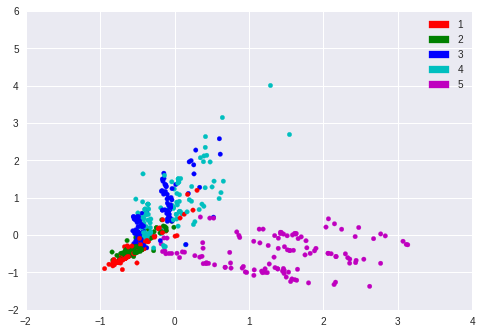

In [7]:
rotulated_data = np.genfromtxt('bases/CNAE_9_reduzido.txt', delimiter=' ')

data = rotulated_data[:,1:]
rotules = rotulated_data[:,0]

Y = alg.pca(data)
colors = {1:'r',2:'g',3:'b',4:'c',5:'m'}
plt.scatter(Y[:, 0], Y[:, 1], 20, np.vectorize(colors.get)(rotules))
plt.axis([-2.0,4.0, -2.0,6.0])
ax = plt.gca()
ax.set_autoscale_on(False) 
plt.legend(handles=[mpatches.Patch(color='r', label='1'),
                    mpatches.Patch(color='g', label='2'),
                    mpatches.Patch(color='b', label='3'),
                    mpatches.Patch(color='c', label='4'),
                    mpatches.Patch(color='m', label='5')])
plt.show()
       

### Letra B
Gere um gráfico 2D com os dois componentes principais (uso de PCA) das amostras, identificando cada classe (a base possui 5 classes). Para este gráfico realize o branqueamento dos dados (isto é, após a aplicação do PCA garantir que a matriz de correlação dos dados seja uma matriz identidade). O que tem de diferente entre os gráficos de a) e b)?


Podemos observar que ambos os gráficos possuem a mesma forma, porém em B os dados estão levemente mais bem distribuidos ao longo dos eixos, deixando ambos os eixos em escalas semelhantes 

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


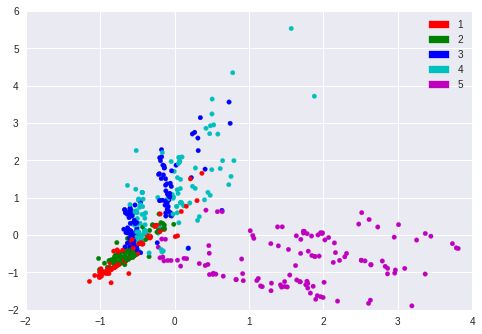

In [36]:
rotulated_data = np.genfromtxt('bases/CNAE_9_reduzido.txt', delimiter=' ')

data = rotulated_data[:,1:]
rotules = rotulated_data[:,0]

Y = alg.pca(data, branq=True)
colors = {1:'r',2:'g',3:'b',4:'c',5:'m'}
plt.scatter(Y[:, 0], Y[:, 1], 20, np.vectorize(colors.get)(rotules))
plt.axis([-2.0,4.0, -2.0,6.0])
ax = plt.gca()
ax.set_autoscale_on(False)
plt.legend(handles=[mpatches.Patch(color='r', label='1'),
                    mpatches.Patch(color='g', label='2'),
                    mpatches.Patch(color='b', label='3'),
                    mpatches.Patch(color='c', label='4'),
                    mpatches.Patch(color='m', label='5')])
plt.show()

### Letra C

Gere um gráfico 2D usando o t-SNE (pode usar o código disponível em https://lvdmaaten.github.io/tsne/ com os parâmetros default), identificando cada classe (a base possui 5 classes). Lembre-se de não usar a coluna de rótulos para obter a redução de dimensão. 

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 600...
Computing P-values for point 500 of 600...
Mean value of sigma: 0.837328


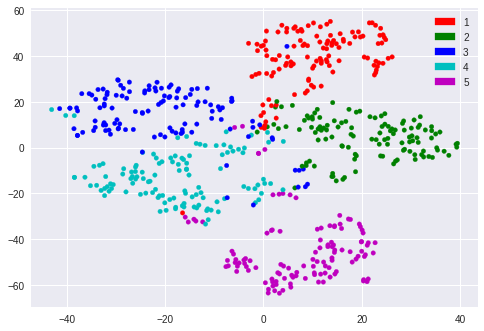

In [9]:
rotulated_data = np.genfromtxt('bases/CNAE_9_reduzido.txt', delimiter=' ')
data = rotulated_data[:,1:]
rotules = rotulated_data[:,0]
Y = tsne.tsne(data, 2, 50, 20.0)
colors = {1:'r',2:'g',3:'b',4:'c',5:'m'}
plt.scatter(Y[:, 0], Y[:, 1], 20, np.vectorize(colors.get)(rotules))
plt.legend(handles=[mpatches.Patch(color='r', label='1'),
                    mpatches.Patch(color='g', label='2'),
                    mpatches.Patch(color='b', label='3'),
                    mpatches.Patch(color='c', label='4'),
                    mpatches.Patch(color='m', label='5')])
plt.show()

### Letra D

Utilize as primeiras 480 amostras para treinar o classificador vizinho mais próximo (NN) (utilize a distância Euclidiana) e as demais 120 para teste. Calcule a métrica acurácia e informe o valor obtido. Pelo resultado obtido, qual dos gráficos (t-SNE ou PCA) você acha que melhor representou a “realidade” da distribuição dos dados? Por quê?

O t-SNE parece representar melhor o conjunto de dados, visto que o PCA apresentou as amostras, princpalmente as amostras das classes 1,2,e 3 muito condensadas em uma mesma região tornando a classificassão muito dificil, oque deveria gerar uma baixa acurácia. Enquanto o t-SNE representa as amostras bem distribuidas, com uma distinção clara das classes, com poucas interseções entre as classes, justificando a alta acurácia devido a facilidade da classificação.

In [8]:
raw_data = np.genfromtxt('bases/CNAE_9_reduzido.txt', delimiter=' ')
train_data = raw_data[:479,1:]
train_rotules = raw_data[:479,0]
val_data = raw_data[480:,1:]
val_rotules = raw_data[480:,0]
classified = alg.kNN(train_data,train_rotules,val_data)

print (np.count_nonzero(classified == val_rotules)/ classified.shape[0])

0.9583333333333334


## Exe. 2

Dada a base de dados Breast Cancer Wisconsin (Diagnostic) (baixar em https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)):

### Letra A

Obtenha a acurácia de classificação quando usando o classificador vizinho mais próximo (NN) (utilize a distância Euclidiana). Use os dados do arquivo wdbc.data, sendo as primeiras  300 amostras para treino e as demais para teste. Antes, repare os atributos da base de dados e a posição dos rótulos. Quais atributos você pode eliminar da base de dados antes do experimento? Por quê?

Além do rotulo, presente na segunda coluna o Id, presente na primeira coluna, foi retirado da base de dados pois era apenas um número para identificação das amostras por isso não fornecia informações relacionadas ao diagnóstico da doença. Todos os outros atributos foram utilizados , pois traziam informações referentes as células observadas nas amostras e poderiam conter informações relevantes relacionadas com o diagnóstico

In [11]:
data_rotules = np.genfromtxt('bases/wdbc.data', delimiter=',', dtype=str, usecols=[1])
data = np.genfromtxt('bases/wdbc.data', delimiter=',')[:,2:]

train_rotules = data_rotules[:299]
train_data = data[:299,:]
val_rotules = data_rotules[300:]
val_data = data[300:,:]

classified = alg.kNN(train_data,train_rotules,val_data)

print (np.count_nonzero(classified == val_rotules)/ classified.shape[0])

0.8847583643122676


### Letra B

Aplique o PCA sobre os dados de treino e selecione o número de componentes até eles corresponderem a 90% da informação de variância dos dados (conforme mostrado nos slides). Quantos componentes foram selecionados? Calcule a nova acurácia do NN usando as componentes selecionadas. O resultado alterou de forma significativa em relação ao obtido em a)? Qual foi a vantagem observada usando PCA?

In [12]:
data_rotules = np.genfromtxt('bases/wdbc.data', delimiter=',', dtype=str, usecols=[1])
data = np.genfromtxt('bases/wdbc.data', delimiter=',')[:,2:]

data = (data - np.min(data,axis = 0))/(np.max(data,axis = 0)-np.min(data,axis = 0)) #normalizalção de amplitude dos dados
#data = data/np.std(data,axis = 0)

comp = alg.pca(data,0) # Use 0 to select all components
variances = np.var(comp, axis = 0)
desired_var = sum(variances)*0.9

addition = 0
for i in range (0,variances.shape[0]):
  addition += variances[i]
  if addition >= desired_var:
    comp = comp[:,:i]
    break

print("Numero de componentes selecionadas:",comp.shape[1]+1)

train_rotules = data_rotules[:299]
train_data = comp[:299,:]
val_rotules = data_rotules[300:]
val_data = comp[300:,:]

classified = alg.kNN(train_data,train_rotules,val_data)

print (np.count_nonzero(classified == val_rotules)/ classified.shape[0])


Numero de componentes selecionadas: 6
0.9479553903345725


### Letra C

Outra técnica para redução de dimensionalidade, mas de forma supervisionada, é o Discriminante Linear de Fisher (para duas classes) e a sua versão multiclasse. Quando aplicado este método o tamanho do vetor de características é reduzido para C-1, onde C é o número de classes do problema. Seguindo os slides de http://www.csd.uwo.ca/~olga/Courses/CS434a_541a/Lecture8.pdf (tem um exemplo no meio), obtenha os novos dados após a aplicação de Fisher sobre os dados de treino e obtenha a acurácia do NN sobre o conjunto de teste. Quais as vantagens desta abordagem sobre o PCA?

O discriminante Linear de fisher é um metodo supervisionado que considera a distribuição de cada classe e projeta as amostras procurando dissociar o maximo possivel as duas classes. Enquanto o PCA é não supervisionado e procura apenas a componente que maximize a dispersão de dados. Por isso o algoritmo de Fisher torna mais facil a cleassificação na maioria dos casos

In [13]:
r = alg.fisher(data, data_rotules)

train_rotules = data_rotules[:299]
train_data = r[:299]
val_rotules = data_rotules[300:]
val_data = r[300:]

classified = alg.kNN(train_data,train_rotules,val_data)

print (np.count_nonzero(classified == val_rotules)/ classified.shape[0])

0.9628252788104089


## Exe. 3

A base de dados Nebulosa (disponibilizada em anexo) está contaminada com ruídos, redundâncias, dados incompletos, inconsistências e outliers. Para esta base:


### Letra A

Obtenha os resultados da classificação (métrica acurácia) usando a técnica do vizinho mais próximo (NN) e Rocchio. Utilize a distância Euclidiana e a base de dados crua, sem pré-processamento. Use o conjunto de 143 amostras para treino e o de 28 amostras para teste. Proponha um tratamento para os dados incompletos.


Os atributos de ID e Nome do usuário foram desconsiderados. As amostras de treino e validação que possuiam valores faltantes foram descartadas.

In [14]:
train_rotulated_data = np.genfromtxt('bases/nebulosa_train.txt', delimiter=' ')[:,2:]
train_rotulated_data = np.array([ td for td in train_rotulated_data if not any(alg.isNaN(d) for d in td)])
train_data = train_rotulated_data[:,:4]
train_rotules = train_rotulated_data[:,5]

val_rotulated_data = np.genfromtxt('bases/nebulosa_test.txt', delimiter=' ')[:,2:]
val_rotulated_data = np.array([ td for td in val_rotulated_data if not any(alg.isNaN(d) for d in td)])
val_data = val_rotulated_data[:,:4]
val_rotules = val_rotulated_data[:,5]

classified_rocchio = alg.rocchio(train_data,train_rotules,val_data)
print ("Rocchio accuracy = ",np.count_nonzero(classified_rocchio == val_rotules)/ classified_rocchio.shape[0])

classified_nn = alg.kNN(train_data,train_rotules,val_data)
print ("NN accuracy = ",np.count_nonzero(classified_nn == val_rotules)/ classified_nn.shape[0])

Rocchio accuracy =  0.48
NN accuracy =  0.72


### Letra B

Realize um pré-processamento sobre os dados de forma a reduzir os ruídos, as redundâncias, inconsistências, outliers e a interferência dos dados incompletos. Obtenha os resultados da classificação usando a técnica do vizinho mais próximo (NN) e Rocchio usando a distância Euclidiana e a mesma divisão dos dados.


Durante o preprocessamento dos dados, primeiramente os dados que estavam fora dos limites descritos pela base de dados com tolerancia de 10% foram substituidos pelo valor mais proximo dentro deste limite, depois as amostras redundantes, ou seja que possuiam todos os atributos e classe iguais foram removias. A seguir as amostras que se distanciavam mais de dois desvios padrão da media da sua classe foram tambem removidos por serem considerados outlayers.  

In [17]:
def tratamento(rotulated_data):
  rotulated_data = np.array([ td for td in rotulated_data if not alg.isNaN(td[-1])])# remove ?
  
  data_range = np.array([[.9,.9,.9,.9,.9,.9],[3.3,4.4,4.4,4.4,4.4,3.3]])
   #remove noise
  for d in rotulated_data:
    for i,elem in enumerate(d):
      if elem < data_range[0,i]:
        d[i] = data_range[0,i]
      if elem > data_range[1,i]:
        d[i] = data_range[1,i]
  
  rotulated_data = np.unique(rotulated_data[:-1], axis=0)#remove redundances
  
  rotules = np.unique(rotulated_data[:,-1])
  data_by_class = [np.array([x for x in rotulated_data if x[-1]== r])for r in rotules]
  
  mean_by_class = [np.mean(c, axis=0) for c in data_by_class]
  std_by_class = [np.std(c, axis=0) for c in data_by_class]
  for j,c in enumerate(data_by_class): #Remove outlayers
    for i in range(0,c.shape[1]-1):
      for elem in c :
        if elem[i] < (mean_by_class[j][i]-2*std_by_class[j][i]) or elem[i] > (mean_by_class[j][i]+2*std_by_class[j][i]) :
          elem[i] = mean_by_class[j][i]
          
  final_result = np.concatenate(tuple(data_by_class))
  
  return final_result

train_rotulated_data = np.genfromtxt('bases/nebulosa_train.txt', delimiter=' ')[:,2:]
train_rotulated_data = np.array([ td for td in train_rotulated_data if not any(alg.isNaN(d) for d in td)])
train_rotulated_data = tratamento(train_rotulated_data)
train_data = train_rotulated_data[:,:4]
train_rotules = train_rotulated_data[:,5]

val_rotulated_data = np.genfromtxt('bases/nebulosa_test.txt', delimiter=' ')[:,2:]
val_rotulated_data = np.array([ td for td in val_rotulated_data if not any(alg.isNaN(d) for d in td)])
val_data = val_rotulated_data[:,:4]
val_rotules = val_rotulated_data[:,5]

classified_rocchio = alg.rocchio(train_data,train_rotules,val_data)
print ("Rocchio accuracy = ",np.count_nonzero(classified_rocchio == val_rotules)/ classified_rocchio.shape[0])

classified_nn = alg.kNN(train_data,train_rotules,val_data)
print ("NN accuracy = ",np.count_nonzero(classified_nn == val_rotules)/ classified_nn.shape[0])

Rocchio accuracy =  0.56
NN accuracy =  0.8


### Letra C

Compare os resultados obtidos em a) e b). Qual deles retornou o melhor resultado?

Como esperado o melhor resultado foi obtido na letra b, que sugere um pre processamento dos dados, dado que informações ruidosas e inconsistentes que atrapalhava os classificadores foram removidos

# Parte II – Regressão Linear

## Exe. 4
Prove que, para uma quantidade de N amostras com entradas x e saídas t, as equações

\begin{align*}
w_0 &= \bar{t\vphantom{+1}} - w_1\bar{x\vphantom{+1}} 
& 
w_1 = \frac{\overline{xt\vphantom{+1}}-\bar{x\vphantom{+1}}\bar{t\vphantom{+1}}}{\overline{x^2\vphantom{+1}}-(\bar{x\vphantom{+1}})^2}
\end{align*}

sendo:

\begin{align*}
\bar{a\vphantom{+1}} &= \frac{1}{N} \sum_{k=1}^{N}a_k
\end{align*}


minimizam a função de perda quadrática média L:

\begin{align*}
L &= \frac{1}{N} \sum_{k=1}^{N}(t_k - (w_0 + w_1x_k))^2
\end{align*}



Para minimizar $L$, precisamos de $w_0$ e $w_1$ tal que a função seja minimizada, ou seja:


\begin{align*}
argmin_{w_0, w_1} (\frac{1}{N} \sum_{k=1}^{N}(t_k - (w_0 + w_1x_k))^2)
\end{align*}

Podemos abordar esse problema de minimização usando os mínimos quadrados, onde:

\begin{align*}
\frac{\partial L}{\partial w_0} &= 0
& 
\frac{\partial L}{\partial w_1} &= 0
\end{align*}

Derivando em relação a um $w_i$ qualquer, podemos dizer que:

\begin{align*}
\frac{\partial L}{\partial w_i} &= \frac{\partial}{\partial w_i} \left(\frac{1}{N} \sum_{k=1}^{N}(t_k - (w_0 + w_1x_k))^2\right) \\
&= \frac{1}{N} \sum_{k=1}^{N}\left(\frac{\partial}{\partial w_i} \left(t_k - (w_0 + w_1x_k)\right)^2\right)
\end{align*}

Aplicando a Regra da Cadeia, obtemos:

\begin{align*}
\frac{\partial}{\partial w_i} \left(t_k - (w_0 + w_1x_k))^2\right) &= 2(t_k - (w_0 + w_1x_k))(\frac{\partial}{\partial w_i}(t_k - (w_0 + w_1x_k)))
\end{align*}

Logo, podemos dizer que precisamos de um $w_i$ tal que satisfaça a seguinte condição:

\begin{align*}
\frac{1}{N} \sum_{k=1}^{N}\left(2(t_k - (w_0 + w_1x_k))(\frac{\partial}{\partial w_i}(t_k - (w_0 + w_1x_k)))\right) &= 0
\end{align*}

Sabendo que:

\begin{align*}
\frac{\partial}{\partial w_0}(t_k - (w_0 + w_1x_k))) &= -1 & \frac{\partial}{\partial w_1}(t_k - (w_0 + w_1x_k))) &= -x_k
\end{align*}

Podemos concluir, para $w_0$, que:

\begin{align*}
\frac{1}{N} \sum_{k=1}^{N}(2(w_0 + w_1x_k - t_k)) &= 0 \\
w_0 &= \frac{1}{N} \sum_{k=1}^{N}(t_k - w_1x_k)) \\
w_0 &= \bar{t\vphantom{+1}} - w_1\bar{x\vphantom{+1}}
\end{align*}

E, para $w_1$, que:

\begin{align*}
\frac{1}{N} \sum_{k=1}^{N}(2x_k(w_0 + w_1x_k - t_k)) &= 0 \\
w_0\overline{x\vphantom{+1}} + w_1\overline{x^2\vphantom{+1}} - \overline{xt\vphantom{+1}} &= 0
\end{align*}

Substituindo $w_0 = \bar{t\vphantom{+1}} - w_1\bar{x\vphantom{+1}}$, podemos concluir para $w_1$:

\begin{align*}
(\bar{t} - w_1\bar{x})\overline{x\vphantom{+1}} + w_1\overline{x^2\vphantom{+1}} - \overline{xt\vphantom{+1}} &= 0 \\
\bar{x}\bar{t} - w_1\big(\bar{x}\big)^2 + w_1\overline{x^2\vphantom{+1}} - \overline{xt\vphantom{+1}} &= 0 \\
w_1(\overline{x^2\vphantom{+1}} - \big(\bar{x})^2\big) &= \overline{xt\vphantom{+1}} - \bar{x}\bar{t} \\
w_1 &= \frac{\overline{xt\vphantom{+1}} - \bar{x}\bar{t}}{\overline{x^2\vphantom{+1}} - \big(\bar{x}\big)^2} \\
\end{align*}

## Exe.5

Para a base de dados Runner (disponibilizada em anexo) obtenha:

### Letra A

A equação linear que se ajusta aos dados e a RMSE;

In [18]:
data = np.genfromtxt('bases/Runner_num.txt', delimiter='\t')
#data = np.array([[1,4.8],[3,11.3],[5,17.2]])
coef = alg.reg_lin(data[:,0], data[:,1])
if coef[1] > 0:
  print("t = %.2f + %.2fx" % (coef[0],coef[1]))
else:
  print("t = %.2f - %.2fx" % (coef[0],abs(coef[1])))
  
print("RMSE = %.2f" % alg.RMSE(data[:,0], data[:,1],coef))

t = 35.55 - 0.01x
RMSE = 0.22


### Letra B

Predizer o resultado para o ano de 2020;

In [19]:
print("Previsão de resultado para 2020 : %.2f s" % (coef[0]+coef[1]*2020))

Previsão de resultado para 2020 : 9.53 s


### Letra C 

Utilize o teste de hipótese de Kendall para verificar se existe dependência entre os atributos. Realize o teste para 5% e 1% de nível de significância. Informe os resultados;

In [20]:
data = np.genfromtxt('bases/Runner_num.txt', delimiter='\t')

if alg.kendall(data,0.05):
  print("Segundo o teste de Pearson com 5% de significância a Hipotese nula é rejeitada, ou seja, as variáveis são relacionadas")
else:
  print("Segundo o teste de Pearson com 5% de significância a Hipotese nula é aceita, ou seja, as variáveis não são relacionadas")
if alg.kendall(data,0.01):
  print("Segundo o teste de Pearson com 1% de significância a Hipotese nula é rejeitada, ou seja, as variáveis são relacionadas")
else:
  print("Segundo o teste de Pearson com 1% de significância a Hipotese nula é aceita, ou seja, as variáveis não são relacionadas")

      

Segundo o teste de Pearson com 5% de significância a Hipotese nula é rejeitada, ou seja, as variáveis são relacionadas
Segundo o teste de Pearson com 1% de significância a Hipotese nula é rejeitada, ou seja, as variáveis são relacionadas


### Letra D

Calcule o coeficiente de correlação entre os dados e realize o teste de hipótese de Pearson para 5% e 1% de nível de significância (teste bilateral). Informe os resultados.

In [4]:
import numpy as np
import scipy.stats as st

data = np.genfromtxt('bases/Runner_num.txt', delimiter='\t')

if alg.pearson(data,0.05):
  print("Segundo o teste de Pearson com 5% de significância a Hipotese nula é rejeitada, ou seja, as variáveis são relacionadas")
else:
  print("Segundo o teste de Pearson com 5% de significância a Hipotese nula é aceita, ou seja, as variáveis não são relacionadas")
  
if alg.pearson(data,0.01):
  print("Segundo o teste de Pearson com 1% de significância a Hipotese nula é rejeitada, ou seja, as variáveis são relacionadas")
else:
  print("Segundo o teste de Pearson com 1% de significância a Hipotese nula é aceita, ou seja, as variáveis não são relacionadas")

Segundo o teste de Pearson com 5% de significância a Hipotese nula é rejeitada, ou seja, as variáveis são relacionadas
Segundo o teste de Pearson com 1% de significância a Hipotese nula é rejeitada, ou seja, as variáveis são relacionadas


## Exe. 6

Para a base de dados Auto MPG (disponibilizada em https://archive.ics.uci.edu/ml/datasets/Auto+MPG) faça:

### Letra A

Baixe o arquivo auto-mpg.data, remova as linhas que tem interrogação (?) e remova a última coluna (por quê?). Com as 150 primeiras linhas obtenha um modelo de regressão linear multivariada para predizer o valor da primeira variável (mpg). Avalie o resultado sobre o restante da base de dados, usando a métrica RMSE.

A ultima coluna continha os nomes dos veículos de cada amostra, como a string do nome é apenas um identificador, ela não traz dados relevantes para predizer o modelo e não está relacionada com nenhum dos outros atributos, por isso ela não foi utilizada.

In [21]:
data = np.genfromtxt('bases/auto-mpg.data', delimiter=(4,4,8,11,11,10,5,3))
data = np.array([ d for d in data if not any(alg.isNaN(i) for i in d)])
w = alg.reg_lin(data[:149,1:],data[:149,0])

print("RMSE :",alg.RMSE(data[150:,1:],data[150:,0],w))


RMSE : 6.4840752987358545


### Letra B

Verifique quais são os atributos que estão relacionados com a saída: A partir dos coeficientes obtidos, aplique o teste F de Snedecor sobre cada variável individualmente (conforme nos slides). Indique quais foram os atributos que podem ser desconsiderados. Obtenha sobre o restante da base de dados a métrica RMSE com o modelo sem considerar esses atributos (não precisa estimar um novo modelo, só considere os valores dos coeficientes deles iguais a zero). Compare os resultados obtidos em a) e em b). Considere que os resíduos do modelo possui distribuição aproximadamente normal e que F1,142 = 3,908.

Como pode ser visto após a seleção das variáveis que mais se relacionavam a saida através do teste F de Snedecor a Raiz do erro quadrático médio(RMSE) diminuiu, indicando que o novo modelo se adequa melhor do que o modelo que considera todos os atributos, oque é esperado já que o proposito do teste é remover atributos que não apresentem uma relação clara com o valor esperado, podendo gerar ruidos na regressão

In [22]:
w = alg.snedecor(data[:149,1:],data[:149,0])

print("Os atributos que foram  considerados segundo o Metdo de Snedecor foram:",np.nonzero(w)[0]+1)
print("RMSE :",alg.RMSE(data[150:,1:],data[150:,0],w))

Os atributos que foram  considerados segundo o Metdo de Snedecor foram: [1 5 8]
RMSE : 5.442628796074691


## Exe. 7

Para a base de dados Polinômio (disponibilizada em anexo), faça:

### Letra A

Divida aleatoriamente a base de dados em duas partes: treino, com 70% das amostras, e teste, com 30%. Use a parte de treino para estimar um modelo linear que melhor se ajusta aos dados, sendo a entrada do modelo a primeira coluna e a saída a segunda coluna. Informe os parâmetros do modelo encontrado e obtenha os valores de RMSE e MAPE sobre o conjunto de treino e teste. Mostre um gráfico do modelo estimado e dos pontos da base de dados. O modelo conseguiu se ajustar bem aos dados? Por quê? 

Apos observar o gráfico que compara o modelo com os dados fica visivel que o modelo proposto não se ajustou bem, os dados mostram uma curva, que poderia ser representada melhor por um polinomio de grau dois ou superior, mas o modelo sugere uma reta, por isso os resultados não foram muito bons como pode-se observar através das métricas

y = -287.01 - 103.05x
MAPE treino : 18.276464901758334
MAPE teste  : 9135.558359759038
RMSE treino : 231.19859040051512
RMSE teste  : 190.60564472550936


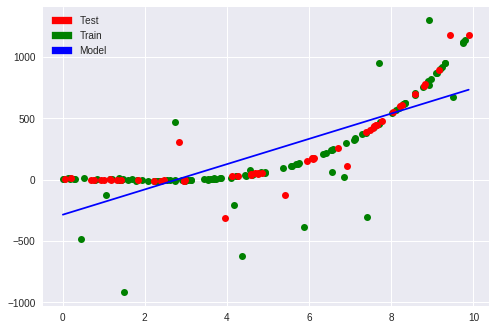

In [24]:
data = np.genfromtxt('bases/Polinômio.txt', delimiter="  ")
np.random.shuffle(data)
train_data = data[:int(data.shape[0]*.7),:]
test_data = data[(int(data.shape[0]*.7)+1):,:]
w = alg.reg_lin(train_data[:,0],train_data[:,1])

if coef[1] > 0:
  print("y = %.2f + %.2fx" % (w[0],w[1]))
else:
  print("y = %.2f - %.2fx" % (w[0],abs(w[1])))

print("MAPE treino :",alg.MAPE(train_data[:,0],train_data[:,1],w))
print("MAPE teste  :",alg.MAPE(test_data[:,0],test_data[:,1],w))
print("RMSE treino :",alg.RMSE(train_data[:,0],train_data[:,1],w))
print("RMSE teste  :",alg.RMSE(test_data[:,0],test_data[:,1],w))

plt.plot(train_data[:,0],train_data[:,1],"go")
plt.plot(test_data[:,0],test_data[:,1],"ro")
plt.plot([np.min(data[:,0]),np.max(data[:,0])],alg.f_polin([np.min(data[:,0]),np.max(data[:,0])],w),"b")

test_patch = mpatches.Patch(color='r', label='Test')
train_patch = mpatches.Patch(color='g', label='Train')
model_patch = mpatches.Patch(color='b', label='Model')
plt.legend(handles=[test_patch,train_patch,model_patch])

plt.show()

### Letra B

Estimar o modelo polinomial que melhor se ajusta aos dados usando os dados de treinamento. Informe os parâmetros do modelo encontrado. Use os fatores de determinação de complexidade QME e R2 dos modelos para auxiliar a encontrar o modelo. Varie do modelo linear até o modelo polinomial acima do melhor encontrado (mostre os resultados obtidos de QME e R2 de cada modelo). Obtenha os valores RMSE e MAPE do modelo obtido sobre os dados de treino e teste. Mostre um gráfico com o novo modelo. O modelo conseguiu se ajustar melhor aos dados? Por quê?

Modelo de ordem 1
R² = 0.670747165078682
QME = 56176.52787738567

Modelo de ordem 2
R² = 0.8609623999961048
QME = 24216.561359171537

Modelo de ordem 3
R² = 0.8815457435192442
QME = 21070.471947579616

Modelo de ordem 4
R² = 0.8821661094557224
QME = 21415.776980756353

Modelo de ordem 5
R² = 0.8819814352050573
QME = 21925.992706418205

Modelo de ordem 6
R² = 0.882979716256039
QME = 22234.63069616149

Modelo de ordem 7
R² = 0.8829898497104114
QME = 22749.744930066023

Modelo de ordem 8
R² = 0.8789615916533114
QME = 24093.24871185453

Modelo de ordem 9
R² = 0.8543585228991925
QME = 29697.689916789168

O modelo que melhor se ajustou foi o de ordem 5
MAPE treino : 634.2538240495237
MAPE teste  : 68.11088770536189
RMSE treino : 145.59515271492128
RMSE teste  : 139.09156751119727


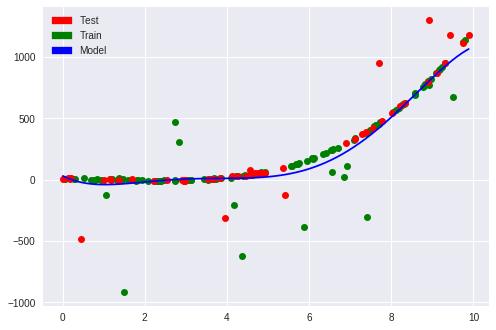

In [27]:
data = np.genfromtxt('bases/Polinômio.txt', delimiter="  ")
np.random.shuffle(data)

data = data[:,::-1]
for i in range(2,10):
  power_data = np.power(data[:,1],i).reshape((data.shape[0],1))
  data = np.append(data,power_data, axis = 1)

train_data = data[:int(data.shape[0]*.7),:]
test_data = data[(int(data.shape[0]*.7)+1):,:]
polinom_x = np.linspace(np.min(data[:,1]),np.max(data[:,1]),num=1000)

R2_list = []
QME_list = []
for i in range(2,11):
  w = alg.reg_lin(train_data[:,1:i],train_data[:,0])

  R2_list.append(alg.R2(test_data[:,1:i],test_data[:,0],w))
  QME_list.append(alg.QME(test_data[:,1:i],test_data[:,0],w,i))
  print("Modelo de ordem",i-1)
  print("R² =",alg.R2(test_data[:,1:i],test_data[:,0],w))
  print("QME =",alg.QME(test_data[:,1:i],test_data[:,0],w,i))
  print()
  
best_ord = int(np.round((np.argmin(QME_list)+np.argmax(R2_list))/2)+1)
#best_ord = 2
print("O modelo que melhor se ajustou foi o de ordem", best_ord)

w = alg.reg_lin(train_data[:,1:best_ord+1],train_data[:,0])
print("MAPE treino :",alg.MAPE(train_data[:,1:best_ord+1],train_data[:,0],w))
print("MAPE teste  :",alg.MAPE(test_data[:,1:best_ord+1],test_data[:,0],w))
print("RMSE treino :",alg.RMSE(train_data[:,1:best_ord+1],train_data[:,0],w))
print("RMSE teste  :",alg.RMSE(test_data[:,1:best_ord+1],test_data[:,0],w))

plt.plot(train_data[:,1],train_data[:,0],"go")
plt.plot(test_data[:,1],test_data[:,0],"ro")

polinom_y = alg.f_polin(polinom_x,w)                         
plt.plot(polinom_x,polinom_y,"b")

test_patch = mpatches.Patch(color='r', label='Test')
train_patch = mpatches.Patch(color='g', label='Train')
model_patch = mpatches.Patch(color='b', label='Model')
plt.legend(handles=[test_patch,train_patch,model_patch])

plt.show()

### Letra C

Utilize o método de Ransac sobre os dados de treinamento para remover os outliers e obter o modelo polinomial. Informe os parâmetros do modelo encontrado. Obtenha o RMSE e MAPE do modelo obtido sobre os dados de treino e teste. Mostre um gráfico com o novo modelo. O Ransac conseguiu ajustar melhor o modelo aos dados?

MAPE treino : 310.37381376825965
MAPE teste  : 18.171750793116516
RMSE treino : 149.99608024034038
RMSE teste  : 155.86256662830803


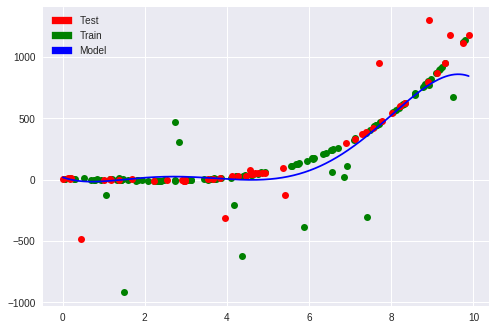

In [29]:
w = alg.ransac(train_data[:,1:best_ord+1],train_data[:,0],100)
print("MAPE treino :",alg.MAPE(train_data[:,1:best_ord+1],train_data[:,0],w))
print("MAPE teste  :",alg.MAPE(test_data[:,1:best_ord+1],test_data[:,0],w))
print("RMSE treino :",alg.RMSE(train_data[:,1:best_ord+1],train_data[:,0],w))
print("RMSE teste  :",alg.RMSE(test_data[:,1:best_ord+1],test_data[:,0],w))

plt.plot(train_data[:,1],train_data[:,0],"go")
plt.plot(test_data[:,1],test_data[:,0],"ro")

polinom_y = alg.f_polin(polinom_x,w)                         
plt.plot(polinom_x,polinom_y,"b")

test_patch = mpatches.Patch(color='r', label='Test')
train_patch = mpatches.Patch(color='g', label='Train')
model_patch = mpatches.Patch(color='b', label='Model')
plt.legend(handles=[test_patch,train_patch,model_patch])

plt.show()

## Exe. 8

Explique o dilema entre bias e variância e o seu relacionamento com underfitting e overfitting.

Duas características comuns nos algoritmos de Machine Learning são o Bias, ou viés, é a distância média entre os valores reais e os preditos pelo algoritmo, e a variância indica quanto os modelos variam de acordo com os dados de treino escolhidos.
Com iso percebemos que os dois extremos são problematicos, um conjunto que acerta muito os dados de treino, ou seja tenha bias baixo, provavelmente vai se adaptar tao bem aos dados do treino que ficará amarrado a ele, ou seja cada conjunto de treino resultará em um modelo de treino completamente diferente , tornado a variância alta. Este caso é denominado overfitting, quando o modelo se adapta muito bem aos casos de treino, mas não representa bem o modelo real, gerando uma acurácia baixa para outros casos.
Po outro lado se relaxarmos muito o bias e procurarmos diminuir a variância ao extremo, para qualquer caso de treino teriamos o mesmo modelo, com isso provavelmente diminuiriamos a diferenca entre a acuracia obtida entre os dados de treino e teste, porém este valor de acurácia pode não ser o mais desejado. este caso é denominado Underfitting, quando o modelo representa mal os casos de teste, ele fica tão genérico que não se ajusta aos dados.
Por isso o ideal é identificar o overfitting e underfitting para se obter um equilíbrio entre bias e variancia, gerando um modelo que se ajuste mais adequadamente ao conjunto de dados como um todo.

# Parte III - Métodos de Classificação Baseados em Distância

## Exe. 9

Para a figura abaixo, obtenha o diagrama de Voronoi das amostras quadrado, triângulo e losango para as métricas de:


### Letra A

Distância Euclidiana;

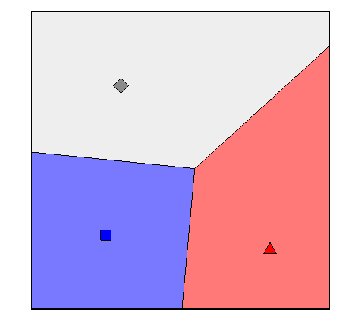

In [3]:
img=mpimg.imread('Images/Voronoi_Euclidian.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

### Letra B

Similaridade Cosseno;

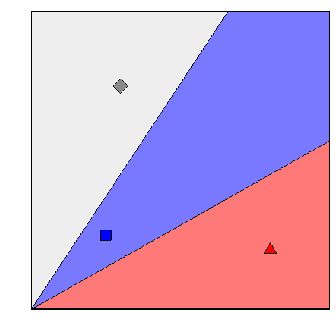

In [4]:
img=mpimg.imread('Images/Voronoi_Cosine.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

### Letra C

Obtenha a classe (quadrado, triângulo ou losango) da amostra círculo para um classificador NN, se for usada a métrica de Distância Euclidiana e a Similaridade Cosseno.

In [32]:

data = np.array([[60,150],[50,50],[160,40]])
rotules = np.array(["losangulo","quadrado","triangulo"])
print ("Pela distancia euclidiana o circulo foi classificado como :",alg.kNN(data,rotules,np.array([[190,130]]),alg.euclidian)[0])
print ("Pela similaridade de cosseno o circulo foi classificado como :",alg.kNN(data,rotules,np.array([[190,130]]),alg.cosine_similarity)[0])

Pela distancia euclidiana o circulo foi classificado como : triangulo
Pela similaridade de cosseno o circulo foi classificado como : quadrado


## Exe. 10

Realize a classificação da base de dados HTRU2 (disponível em https://archive.ics.uci.edu/ml/datasets/HTRU2) usando o esquema de validação hold-out. Para cada execução, use 6000 amostras de treino selecionadas aleatoriamente e o restante para teste (normalmente o conjunto de treinamento é maior do que de teste, mas para reduzir o custo computacional ele foi reduzido aqui). Execute 5 vezes o treinamento e teste e retorne a acurácia, recall e precisão média para cada algoritmo. Faça a classificação usando:

### Letra A

Rocchio com métrica de distância Mahalanobis;

In [34]:
data = np.genfromtxt('bases/HTRU_2.csv', delimiter=',')
acc = 0
rec = 0
pre = 0
for i in range(0,5):
  np.random.shuffle(data)
  train_data = data[:6000,:]
  val_data = data[6000:,:]

  trained = alg.rocchio(train_data[:,:-1],train_data[:,-1],val_data[:,:-1],alg.mahalanobis)
  acc += alg.accuracy(trained,val_data[:,-1])
  rec += alg.recall(trained,val_data[:,-1])
  pre += alg.precision(trained,val_data[:,-1])

print("Accuracy =",acc/5)
print("Recall =",rec/5)
print("Precision =",pre/5)

Accuracy = 0.8480584972264247
Recall = 0.9004150298348914
Precision = 0.36755578139119555


### Letra B

kNN com métrica de distância Euclidiana. Para selecionar o melhor valor de k divida a base de treinamento em duas partes iguais: uma para treinar e a outra para validar e encontrar o melhor valor de k;

In [7]:

data = np.genfromtxt('bases/HTRU_2.csv', delimiter=',')
#data = data[:500,:]
acc = np.zeros(10)
for i in range(0,5):
   
  train_data = data[:np.round(data.shape[0]/2).astype(int),:]
  val_data = data[np.round(data.shape[0]/2).astype(int):,:]
 
  _,d = alg.kNN(train_data[:,:-1],train_data[:,-1],val_data[:,:-1],alg.euclidian,return_distances = True)#Just to compute the distances
  print("Distances computed iteration :",i+1)
  for k in range(1,11):
    trained = alg.kNN(train_data[:,:-1],train_data[:,-1],val_data[:,:-1],alg.euclidian,k=k,distances = d)
    acc[k-1] += alg.accuracy(trained,val_data[:,-1])

acc /= 5.0
for k in range(1,11):
  print("Accuracy mean for k=",k,":",acc[k-1])
  
k_best = np.argmax(acc)+1
print("\nBest accuracy for k =",k_best)
      

Distances computed iteration : 1
Distances computed iteration : 2
Distances computed iteration : 3
Distances computed iteration : 4
Distances computed iteration : 5
Accuracy mean for k= 1 : 0.9612247178455693
Accuracy mean for k= 2 : 0.9641300703989273
Accuracy mean for k= 3 : 0.9642418147279026
Accuracy mean for k= 4 : 0.9637948374120013
Accuracy mean for k= 5 : 0.9665884456363839
Accuracy mean for k= 6 : 0.960330763213767
Accuracy mean for k= 7 : 0.9649122807017545
Accuracy mean for k= 8 : 0.9596602972399151
Accuracy mean for k= 9 : 0.9629008827801989
Accuracy mean for k= 10 : 0.9578723879763104

Best accuracy for k = 5


### Letra C

Use o Edit-kNN para classificar com métrica de distância Euclidiana. Pode ser o mesmo valor de k da letra b).

In [8]:
data = np.genfromtxt('bases/HTRU_2.csv', delimiter=',')
np.random.shuffle(data)

train_data = data[:np.round(data.shape[0]/2).astype(int),:]
val_data = data[np.round(data.shape[0]/2).astype(int):,:]

start = time.time()
print ("Standard kNN Accuracy :",alg.accuracy(alg.kNN(train_data[:,:-1],train_data[:,-1],val_data[:,:-1],alg.euclidian,k = k_best),val_data[:,-1]))
print ("Standard kNN Time Spent :",time.time()-start)

start = time.time()
edited_train = alg.edit(train_data[:,:-1],train_data[:,-1],alg.euclidian,k = k_best)
print ("Edited kNN Accuracy :",alg.accuracy(alg.kNN(edited_train[:,:-1],edited_train[:,-1],val_data[:,:-1],alg.euclidian,k = k_best),val_data[:,-1]))
print ("Edited kNN Time Spent :",time.time()-start)

Standard kNN Accuracy : 0.9434573695384959
Standard kNN Time Spent : 447.4259696006775
Edited kNN Accuracy : 0.9051290646999665
Edited kNN Time Spent : 73.13529849052429


### Letra D

Compare os resultados, tempos de execução e número de protótipos usados por cada algoritmo. Considerando a distribuição das classes, você considera o valor da acurácia média relevante? Por quê?

Ao analizarmos a base sugerida para o exercício percebe-se imediatamente que possui um grande volume de dados e que os dados estão bem desbalanceados, das quase 18 mil amostras cerca de 1500 representam umadas classes , ou seja mais de 90% da base é de uma mesma classe.

Devido ao grande número de mostras na Base o kNN se torna muito custoso, demorando muito tempo para classificar as amostras, A pesar disto tem a melhor acurácia dentre os algoritmos analizados.

O rocchio possui uma execução mais rápida, mesmo com um grande volume de dados, ele obteve uma boa precisão, apesar de baixa acurácia.

Por fim o edit kNN obteve um resultado intermediário, uma precisão proxima ao kNN, porém com muito menos tempo de processamento, tornando este o algoritmo mais adequado para este caso.

## Exe. 11

Usando as técnicas de seleção de características SFS e SBS sobre a base de dados Wine (disponível em https://archive.ics.uci.edu/ml/datasets/Wine) faça:

### Letra A

Divida a base de dados em três partes de forma estratificada. Selecione 5 atributos usando uma parte da base de dados como treinamento e valide os atributos sobre uma outra parte usando a métrica acurácia. Após determinar os 5 atributos, obtenha a acurácia sobre a terceira parte, usando as duas partes anteriores como treinamento. Use o classificador Vizinho mais Próximo nesta tarefa. Quais foram os atributos selecionados?

In [6]:
def SFS(train_data,train_rotules,val_data,val_rotules, n):
  att = np.array([])
  while n > 0:
    best_acc = 0
    best_att = 0
    for i in range(train_data.shape[1]):
      if i in att:
        continue
      temp_att = np.append(att,[i])
      trained = alg.kNN(train_data[:,temp_att.astype(int)],train_rotules,val_data[:,temp_att.astype(int)])
      acc = alg.accuracy(trained,val_rotules)
      if acc > best_acc:
        best_acc = acc
        best_att = i
    att = np.append(att,[best_att])
    n -= 1
  return att.astype(int)

def SBS(train_data,train_rotules,val_data,val_rotules, n):
  att = np.arange(train_data.shape[1])
  n = train_data.shape[1] - n
  while n > 0:
    best_acc = 0
    best_att_idx = 0
    for i in range(att.shape[0]):
      temp_att = np.delete(att,i)
      trained = alg.kNN(train_data[:,temp_att.astype(int)],train_rotules,val_data[:,temp_att.astype(int)])
      acc = alg.accuracy(trained,val_rotules)
      if acc > best_acc:
        best_acc = acc
        best_att_idx = i
    att = np.delete(att,best_att_idx)
    n -= 1
  return att.astype(int)
  
  
data = np.genfromtxt('bases/wine.data', delimiter=',')
d0 = np.array([x for i,x in enumerate(data) if i % 3 == 0])
d1 = np.array([x for i,x in enumerate(data) if i % 3 == 1])
d2 = np.array([x for i,x in enumerate(data) if i % 3 == 2])
train = np.append(d0,d1,axis = 0)

selected = SFS(d0[:,1:],d0[:,0],d1[:,1:],d1[:,0],5)+1
print("Atributos Selecionados pelo SFS :",selected)
trained = alg.kNN(train[:,selected],train[:,0],d2[:,selected])
print("SFS Accuracy :",alg.accuracy(trained,d2[:,0]))

selected = SBS(d0[:,1:],d0[:,0],d1[:,1:],d1[:,0],5)+1
print("Atributos Selecionados pelo SFS :",selected)
trained = alg.kNN(train[:,selected],train[:,0],d2[:,selected])
print("SFS Accuracy :",alg.accuracy(trained,d2[:,0]))



Atributos Selecionados pelo SFS : [ 7  1  6 11  8]
SFS Accuracy : 0.8813559322033898
Atributos Selecionados pelo SFS : [ 1  2  7  9 11]
SFS Accuracy : 0.9322033898305084


### Letra B

Realize o mesmo procedimento, mas agora selecionando 10 atributos;

In [7]:
selected = SFS(d0[:,1:],d0[:,0],d1[:,1:],d1[:,0],10)+1
print("Atributos Selecionados pelo SFS :",selected)
trained = alg.kNN(train[:,selected],train[:,0],d2[:,selected])
print("SFS Accuracy :",alg.accuracy(trained,d2[:,0]))

selected = SBS(d0[:,1:],d0[:,0],d1[:,1:],d1[:,0],10)+1
print("Atributos Selecionados pelo SBS :",selected)
trained = alg.kNN(train[:,selected],train[:,0],d2[:,selected])
print("SFS Accuracy :",alg.accuracy(trained,d2[:,0]))


Atributos Selecionados pelo SFS : [ 7  1  6 11  8  2  9  3 12  4]
SFS Accuracy : 0.8813559322033898
Atributos Selecionados pelo SBS : [ 1  2  3  6  7  8  9 10 11 12]
SFS Accuracy : 0.8983050847457628


### Letra C

Realize o mesmo procedimento de a) e b), mas agora selecionando os atributos usando duas partes para treinamento e validando sobre as mesmas duas partes. Após determinar os atributos, obtenha a acurácia sobre a terceira parte. A acurácia sobre a terceira parte foi melhor, igual ou pior do que as obtidas nas letras a) e b)? Esse era o resultado esperado? Por quê?

Como esperado, ao utilizarmos a mesma base para treino e validação da seleção os a acurácia cai um pouco, pois o algoitmo acaba se adaptando aos dados específicos e não ao comportamento geral dos dados. Este comportamento é denominado overfitting, onde o algoritmo se adapta muito bem a base de testes, mas não ao contexto geral

In [9]:
selected = SFS(train[:,1:],train[:,0],train[:,1:],train[:,0],5)+1
print("5 Atributos Selecionados pelo SFS :",selected)
trained = alg.kNN(train[:,selected],train[:,0],d2[:,selected])
print("SFS Accuracy :",alg.accuracy(trained,d2[:,0]))

selected = SFS(train[:,1:],train[:,0],train[:,1:],train[:,0],10)+1
print("10 Atributos Selecionados pelo SFS :",selected)
trained = alg.kNN(train[:,selected],train[:,0],d2[:,selected])
print("SFS Accuracy :",alg.accuracy(trained,d2[:,0]))


selected = SBS(train[:,1:],train[:,0],train[:,1:],train[:,0],5)+1
print("5 Atributos Selecionados pelo SBS :",selected)
trained = alg.kNN(train[:,selected],train[:,0],d2[:,selected])
print("SFS Accuracy :",alg.accuracy(trained,d2[:,0]))

selected = SBS(train[:,1:],train[:,0],train[:,1:],train[:,0],10)+1
print("10 Atributos Selecionados pelo SBS :",selected)
trained = alg.kNN(train[:,selected],train[:,0],d2[:,selected])
print("SFS Accuracy :",alg.accuracy(trained,d2[:,0]))

5 Atributos Selecionados pelo SFS : [10  1  2  3  4]
SFS Accuracy : 0.7627118644067796
10 Atributos Selecionados pelo SFS : [10  1  2  3  4  5  6  7  8  9]
SFS Accuracy : 0.8305084745762712
5 Atributos Selecionados pelo SBS : [ 9 10 11 12 13]
SFS Accuracy : 0.6949152542372882
10 Atributos Selecionados pelo SBS : [ 4  5  6  7  8  9 10 11 12 13]
SFS Accuracy : 0.7796610169491526
